# Power Apparatus and System Design
---
## Assignment 1 - Part 2

In [1]:
# Importing pandas library
import pandas as pd 
# Makes our plot appear in notebook
%matplotlib inline
# Importing pyplot library
import matplotlib.pyplot as plt
# Setting display limitations for pandas dataframe
pd.set_option('display.width', 500) 
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
# Importing Seaborn library
import seaborn as sns
# Setting Seaborn Parameters
sns.set_style("whitegrid") 
sns.set_context("poster")

In [2]:
# Order of columns according to input data
names=['Branch No.', 'Sending Node(S)', 'Recieving Node(R)', 'Branch Resistance(Ohm)',
       'Branch Reactance(Ohm)', 'Active Power(kW)', 'Reactive Power(kVar)'] 
# Reading input data in the form of csv
data = pd.read_csv('data2.csv', names=names) 
data

,Branch No.,Sending Node(S),Recieving Node(R),Branch Resistance(Ohm),Branch Reactance(Ohm),Active Power(kW),Reactive Power(kVar)
0,33,32,0.000001,100.0000,12.6600,100.0,NaN
1,1,1,2.000000,0.0922,0.0470,100.0,60.0
2,2,2,3.000000,0.4930,0.2511,90.0,40.0
3,3,3,4.000000,0.3660,0.1864,120.0,80.0
4,4,4,5.000000,0.3811,0.1941,60.0,30.0
5,5,5,6.000000,0.8190,0.7070,60.0,20.0
6,6,6,7.000000,0.1872,0.6188,200.0,100.0
7,7,7,8.000000,0.7114,0.2351,200.0,100.0
8,8,8,9.000000,1.0300,0.7400,60.0,20.0
9,9,9,10.000000,1.0440,0.7400,60.0,20.0


In [3]:
params = data[0:1] # First row of input csv file i.e. Base Parameters
data = data[1:] # Discarding first row of data from dataframe
Nbus = params.iloc[0, 0] #Total Number of Buses in the System
Nbranch = params.iloc[0, 1] # Total Number of Branches in the System
e = params.iloc[0, 2] # Maximum allowed error
imax = int(params.iloc[0, 3]) # Maximum Number of iterations
Vb = params.iloc[0, 4] # Vbase(kV) for the System
Sb = params.iloc[0, 5] # Sbase(MVA) for the System
Zb = Vb*Vb/Sb # Zbase for the System
print('Number of Buses: ', Nbus, '\nNumber of Branches: ', Nbranch,
     '\nMaximum allowed error: ', e, '\nMaximum numbers of iterations: ', imax,
     '\nVbase(kV) for the System: ', Vb, '\nSbase(MVA) for the System: ', Sb,
     '\nZbase for the System(Ohm) : ', Zb)

Number of Buses:  33.0 
Number of Branches:  32.0 
Maximum allowed error:  1e-06 
Maximum numbers of iterations:  100 
Vbase(kV) for the System:  12.66 
Sbase(MVA) for the System:  100.0 
Zbase for the System(Ohm) :  1.602756


In [4]:
# Multiplying Sb with 1000 to match dimensions
data[['kW(p.u.)', 'kVar(p.u.)']] = data[['Active Power(kW)', 'Reactive Power(kVar)']] / (Sb*1000)
# R(p.u.) = R/Zbase
data[['R(p.u.)', 'X(p.u.)']] = data[['Branch Resistance(Ohm)', 'Branch Reactance(Ohm)']] / Zb 
# Changing column Recieving Node to int type.
data['Recieving Node(R)'] = data['Recieving Node(R)'].astype(int) 
data

/home/gaara/miniconda3/envs/system_design/lib/python3.6/site-packages/pandas/core/frame.py:2440: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/home/gaara/miniconda3/envs/system_design/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Branch No.,Sending Node(S),Recieving Node(R),Branch Resistance(Ohm),Branch Reactance(Ohm),Active Power(kW),Reactive Power(kVar),kW(p.u.),kVar(p.u.),R(p.u.),X(p.u.)
1,1,1,2,0.0922,0.0470,100.0,60.0,0.00100,0.00060,0.057526,0.029324
2,2,2,3,0.4930,0.2511,90.0,40.0,0.00090,0.00040,0.307595,0.156668
3,3,3,4,0.3660,0.1864,120.0,80.0,0.00120,0.00080,0.228357,0.116300
4,4,4,5,0.3811,0.1941,60.0,30.0,0.00060,0.00030,0.237778,0.121104
5,5,5,6,0.8190,0.7070,60.0,20.0,0.00060,0.00020,0.510995,0.441115
6,6,6,7,0.1872,0.6188,200.0,100.0,0.00200,0.00100,0.116799,0.386085
7,7,7,8,0.7114,0.2351,200.0,100.0,0.00200,0.00100,0.443860,0.146685
8,8,8,9,1.0300,0.7400,60.0,20.0,0.00060,0.00020,0.642643,0.461705
9,9,9,10,1.0440,0.7400,60.0,20.0,0.00060,0.00020,0.651378,0.461705
10,10,10,11,0.1966,0.0650,45.0,30.0,0.00045,0.00030,0.122664,0.040555


In [5]:
# Initializing empty dataframe for performing calculations
calculations = pd.DataFrame() 
# Plucking out relevant columns from data
calculations = data[['Branch No.', 'Sending Node(S)', 'Recieving Node(R)']]
# Initializing Sending end  and Recieving end Node voltages with 1+0j
calculations.insert(loc = calculations.shape[1], column='Sv', value = complex(1, 0)) 
calculations.insert(loc = calculations.shape[1], column='Rv', value = complex(1, 0))
# Initializing Branch Current column(I).
calculations.insert(loc = calculations.shape[1], column='I', value = None)
# Plucking out Resistance, Reactance, Active Power(p.u.), Reactive Power(p.u.) from the dataframe
calculations[['R(p.u.)', 'X(p.u.)', 'kW(p.u.)', 'kVar(p.u.)']] = data[['R(p.u.)', 'X(p.u.)', 'kW(p.u.)', 'kVar(p.u.)']]
calculations

/home/gaara/miniconda3/envs/system_design/lib/python3.6/site-packages/pandas/core/frame.py:2440: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,Branch No.,Sending Node(S),Recieving Node(R),Sv,Rv,I,R(p.u.),X(p.u.),kW(p.u.),kVar(p.u.)
1,1,1,2,(1+0j),(1+0j),None,0.057526,0.029324,0.00100,0.00060
2,2,2,3,(1+0j),(1+0j),None,0.307595,0.156668,0.00090,0.00040
3,3,3,4,(1+0j),(1+0j),None,0.228357,0.116300,0.00120,0.00080
4,4,4,5,(1+0j),(1+0j),None,0.237778,0.121104,0.00060,0.00030
5,5,5,6,(1+0j),(1+0j),None,0.510995,0.441115,0.00060,0.00020
6,6,6,7,(1+0j),(1+0j),None,0.116799,0.386085,0.00200,0.00100
7,7,7,8,(1+0j),(1+0j),None,0.443860,0.146685,0.00200,0.00100
8,8,8,9,(1+0j),(1+0j),None,0.642643,0.461705,0.00060,0.00020
9,9,9,10,(1+0j),(1+0j),None,0.651378,0.461705,0.00060,0.00020
10,10,10,11,(1+0j),(1+0j),None,0.122664,0.040555,0.00045,0.00030


In [6]:
# Function for finding sequences
def sequence_finder(calculations, index=0, l=None, Sequence = []):
    if l is None:
        l = []
    l.append(calculations.iloc[index, 0]) # Appending Branch No. from index'th row
    R = calculations.iloc[index, 2] # Recieving End Node of index'th row
    x = calculations.loc[calculations['Sending Node(S)']==R] # Dataframe with all the rows where S == R
    for i in range(x.shape[0]):
        if i == 0:
            sequence_finder(calculations, index=x.index.values[0] - 1, l=l, Sequence = Sequence)
        else: # If there is more than one Branch then removing later ones into another sequences
            sequence_finder(calculations, index=x.index.values[i] - 1, Sequence = Sequence)
    if x.shape[0] == 0: # If no Branches are found terminate by adding found sequence into Global Variable.
        Sequence.append(l)
    return Sequence

In [7]:
Sequence = sequence_finder(calculations)
for i in range(len(Sequence)):
    Sequence[i] = Sequence[i][::-1] # Reversing the sequences Useful later on
print(Sequence)

[[17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1], [32, 31, 30, 29, 28, 27, 26, 25], [24, 23, 22], [21, 20, 19, 18]]


In [8]:
def current_calculator(calculations, Sequence, Inow = None):
    joints = [] # Empty array to store where one sequence joins other sequence
    if Inow is None:
        Inow = complex(0, 0)
    for i in range(1,len(Sequence)):
        joints.append(Sequence[i][-1])
    for i in range(len(Sequence)):
        for j in Sequence[i]:
            if j in joints:
                NewSequence = []
                s = calculations.loc[calculations['Branch No.']==j]
                index = s.index.values[0] - 1
                Itemp = complex(calculations.iloc[index, 8], 
                                     calculations.iloc[index, 9]*-1)/calculations.iloc[index, 4].conjugate()
                Inow = Inow + Itemp
                calculations.iloc[index, 5] = Inow
                S = s.iloc[0, 1] # Sending end Node of j branch
                # Finding the row where R is equal to S of j branch
                b = calculations.loc[calculations['Recieving Node(R)']==S] 
                # Branch before j branch
                B = b.iloc[0, 0]
                for l in range(len(Sequence)):
                    if B in Sequence[l]:
                        NewSequence.append(Sequence[l])
                for i in range(len(NewSequence)):
                    if B in NewSequence[i]:
                        for j in range(len(NewSequence[i])):
                            if NewSequence[i][j] == B:
                                NewSequence[i] = NewSequence[i][j:]
                                break
                calculations = constant_current_adder(calculations, NewSequence, Inow)
            else:
                I = calculations.loc[calculations['Branch No.']==j]
                index = I.index.values[0] - 1
                # Important Caveat discuss in alternate case
                #
                Itemp = complex(calculations.iloc[index, 8], 
                                                     calculations.iloc[index, 9]*-1)/calculations.iloc[index, 4].conjugate()
    
                
                #Itemp = complex(calculations.iloc[index, 8], 
                 #                                     calculations.iloc[index, 9]*-1)/calculations.iloc[index, 3].conjugate()
                Inow = Inow + Itemp
                calculations.iloc[index, 5] = Inow
    return calculations

def constant_current_adder(calculations, NewSequence, I):
    for i in range(len(NewSequence)):
        for k in NewSequence[i]:
                    x = calculations.loc[calculations['Branch No.']==k]
                    calculations.iloc[x.index.values[0]-1, 5] += I
    return calculations

In [9]:
def voltage_corrector(calculations):
    delta = 0 
    for i in range(calculations.shape[0]):
        # Storing current value of Rv for calculating delta
        temp = calculations.iloc[i, 4]
        # Rv = Sv - Z*I
        calculations.iloc[i, 4] = calculations.iloc[i, 3] - complex(calculations.iloc[i, 6], calculations.iloc[i, 7])*calculations.iloc[i, 5]
        # Finding a dataframe where Sv = Rv(current row)
        x = calculations.loc[calculations['Sending Node(S)'] == calculations.iloc[i, 2]]
        if abs(calculations.iloc[i, 4]-temp) > delta:
            delta = abs(calculations.iloc[i, 4] - temp)
        for j in x.index.values:
            calculations.iloc[j - 1, 3] = calculations.iloc[i, 4]
    return calculations, delta

In [10]:
def power_flow_analysis(df, Sequence, imax, e):
    errors = []
    for i in range(imax):
        df = current_calculator(df, Sequence)
        df, delta = voltage_corrector(df)
        errors.append(delta)
        if delta < e:
            break
    return df, errors

In [11]:
t, u = power_flow_analysis(calculations,Sequence, imax, e)

/home/gaara/miniconda3/envs/system_design/lib/python3.6/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [12]:
t

,Branch No.,Sending Node(S),Recieving Node(R),Sv,Rv,I,R(p.u.),X(p.u.),kW(p.u.),kVar(p.u.)
1,1,1,2,(1+0j),(0.990478675426+0.000909565847398j),(0.12497740681-0.0795200676723j),0.057526,0.029324,0.00100,0.00060
2,2,2,3,(0.990478675426+0.000909565847398j),(0.957105172192+0.00417154811502j),(0.0818606847933-0.0522989444279j),0.307595,0.156668,0.00090,0.00040
3,3,3,4,(0.957105172192+0.00417154811502j),(0.94420614645+0.00538754724516j),(0.042699202238-0.0270712601065j),0.228357,0.116300,0.00120,0.00080
4,4,4,5,(0.94420614645+0.00538754724516j),(0.931179843699+0.00660821604473j),(0.0414235005218-0.0262312665804j),0.237778,0.121104,0.00060,0.00030
5,5,5,6,(0.931179843699+0.00660821604473j),(0.898912138786+0.00186266290746j),(0.0407769029827-0.0259136833269j),0.510995,0.441115,0.00060,0.00020
6,6,6,7,(0.898912138786+0.00186266290746j),(0.895217288145-0.00217124027971j),(0.0122245849168-0.0058718515485j),0.116799,0.386085,0.00200,0.00100
7,7,7,8,(0.895217288145-0.00217124027971j),(0.890085032176-0.00152902559406j),(0.00999321318375-0.00474939255019j),0.443860,0.146685,0.00200,0.00100
8,8,8,9,(0.890085032176-0.00152902559406j),(0.883433405531-0.00277871005575j),(0.00774817383233-0.00362204792898j),0.642643,0.461705,0.00060,0.00020
9,9,9,10,(0.883433405531-0.00277871005575j),(0.877261536299-0.00383236789303j),(0.00706972439972-0.00339352455472j),0.651378,0.461705,0.00060,0.00020
10,10,10,11,(0.877261536299-0.00383236789303j),(0.87634985127-0.00370345373606j),(0.00638678696682-0.00316255895937j),0.122664,0.040555,0.00045,0.00030


In [13]:
u

[0.1794474563066783,
 0.022863330886727519,
 0.0034145560185287224,
 0.00051969174457205253,
 7.9288677351901487e-05,
 1.2100636281348806e-05,
 1.8468024183422658e-06,
 2.8186047205358418e-07]

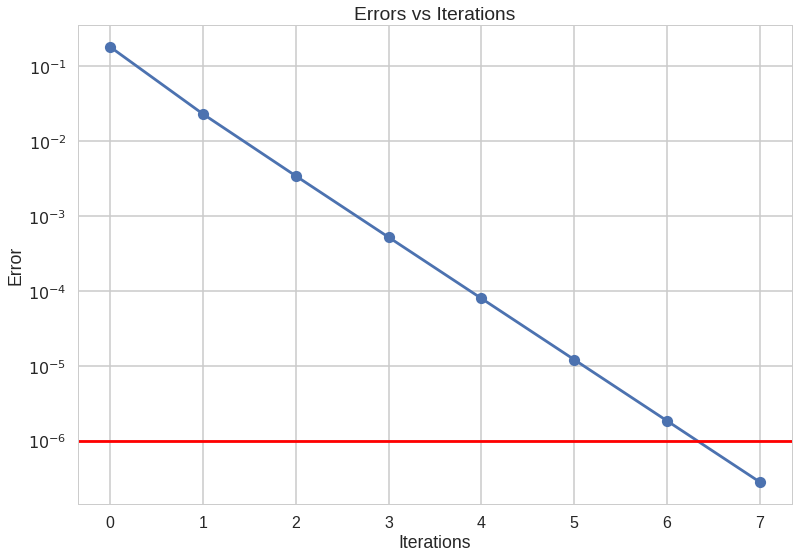

In [14]:
plt.plot(range(len(u)), u, 'o-')
plt.yscale('log')
plt.axhline(e, 0, 1, color='r')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Errors vs Iterations');

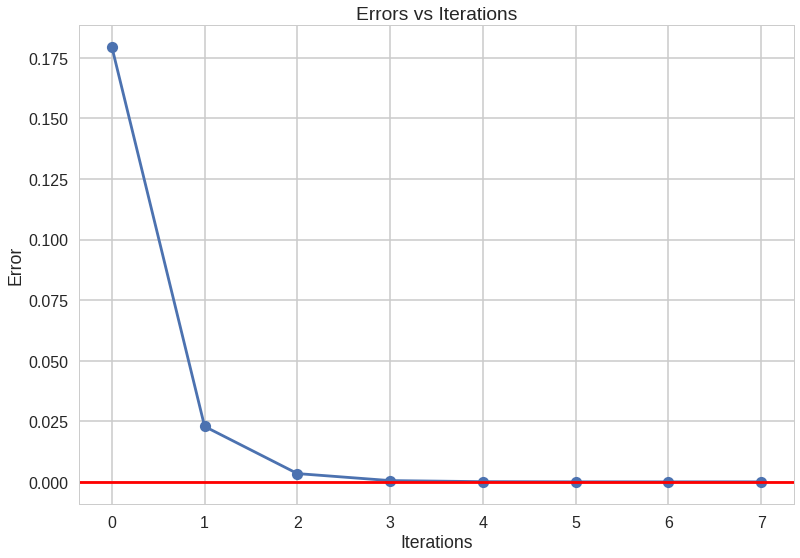

In [15]:
plt.plot(range(len(u)), u, 'o-')
plt.axhline(e, 0, 1, color='r')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Errors vs Iterations');

In [16]:
source_power = t.iloc[0, 3]*t.iloc[0, 5]
Ps = abs(source_power.real)
Qs = abs(source_power.imag)
TPL = t['kW(p.u.)'].sum()
TQL = t['kVar(p.u.)'].sum()
print('Ploss = ', Ps - TPL)
print('Qloss = ', Qs - TQL)

Ploss =  0.0878274068102
Qloss =  0.0565200676723
